In [ ]:
import pandas as pd
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv')

In [ ]:
df.shape

(299, 13)

Tells us the number of rows and columns in our dataset.
df.columns lets us see all columns in our dataset.
Based on df.info we can tell our dtaset mainly consist of  continous data with some binary columns which is considered to be ctaegorical. 
The dataset in question is of high quality and no preprocessing was required.

In [ ]:
df.columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

Any columns that only have 2 unique values are considered to be binary. The fewer the unique values, the more likely the data is to categorical as the answer can only take a specific amount of values. 

In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

isnull tells us how many values there are in the dataset that are empty which is an indicator of high quality dataset. dup tells us of the number of rows that contain the same information. again an indicator of a good quality dataset.

In [ ]:
dup = df.duplicated().sum()
if dup:
  print('duplicates are'.format(dup))
else:
  print('no duplicates')

no dups


This desribes the data numerically where the mean and std, min value and etc are present.

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:

df['DEATH_EVENT'] = df.DEATH_EVENT.replace({1: "Death", 0: "No_death"})
df['sex'] = df.sex.replace({1: "Male", 0: "Female"})
df['anaemia'] = df.anaemia.replace({1: "Yes", 0: "No"})
df['diabetes'] = df.diabetes.replace({1: "True", 0: "False"})
df['high_blood_pressure'] = df.high_blood_pressure.replace({1: "True", 0: "False"})


convert each binary attribute to categorical in order to plot them against death_event.

In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,No,582,False,20,True,265000.00,1.9,130,Male,0,4,Death
1,55.0,No,7861,False,38,False,263358.03,1.1,136,Male,0,6,Death
2,65.0,No,146,False,20,False,162000.00,1.3,129,Male,1,7,Death
3,50.0,Yes,111,False,20,False,210000.00,1.9,137,Male,0,7,Death
4,65.0,Yes,160,True,20,False,327000.00,2.7,116,Female,0,8,Death
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,No,61,True,38,True,155000.00,1.1,143,Male,1,270,No_death
295,55.0,No,1820,False,38,False,270000.00,1.2,139,Female,0,271,No_death
296,45.0,No,2060,True,60,False,742000.00,0.8,138,Female,0,278,No_death
297,45.0,No,2413,False,38,False,140000.00,1.4,140,Male,1,280,No_death


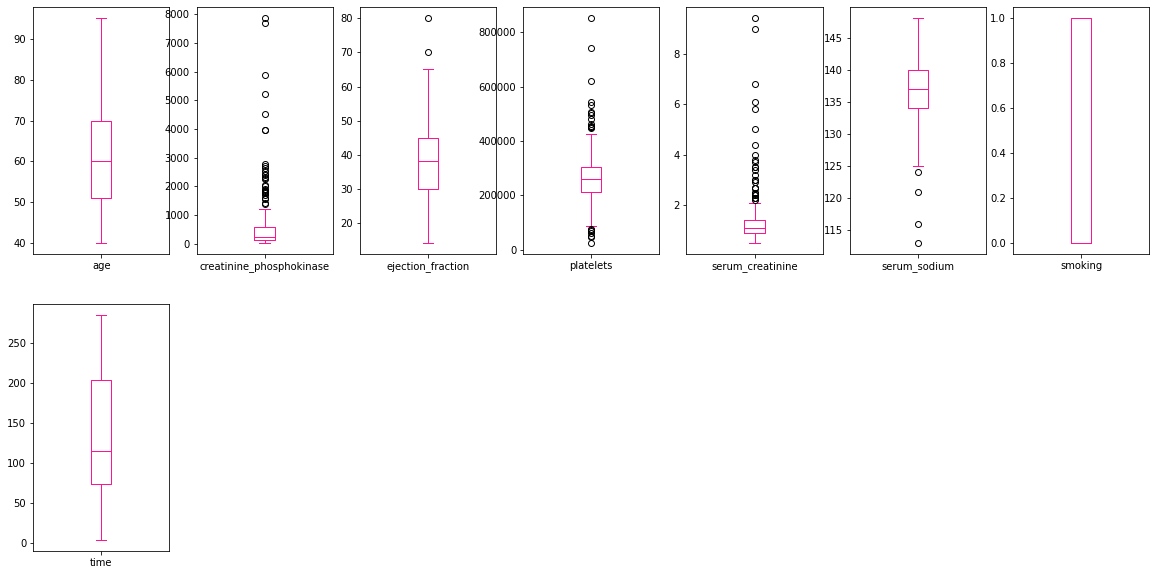

In [ ]:
df.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10), 
color='deeppink');

In [ ]:
import numpy as np


create box plots for each variable and it shows us the outliers in our dataset.

In [ ]:
# define continuous variable & plot
continous_features = ['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(df[continous_features])

For the feature creatinine_phosphokinase, No of Outliers is 29
For the feature ejection_fraction, No of Outliers is 2
For the feature platelets, No of Outliers is 21
For the feature serum_creatinine, No of Outliers is 29
For the feature serum_sodium, No of Outliers is 4


identified all the outliers in our dataset and have removed them to further imporve the qyality of the dataset.

In [ ]:
outliers(df[continous_features],drop = True)

Outliers from creatinine_phosphokinase feature removed
Outliers from ejection_fraction feature removed
Outliers from platelets feature removed
Outliers from serum_creatinine feature removed
Outliers from serum_sodium feature removed


In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # To visualize missing value
import plotly.graph_objects as go # To Generate Graphs
import plotly.express as px # To Generate box plot for statistical representation
%matplotlib inline

Text(0.5, 1.0, 'Age Distribution')

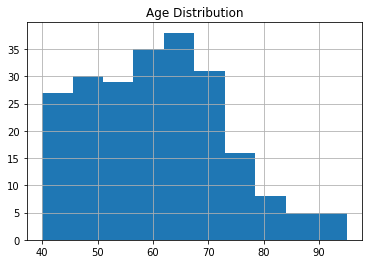

In [ ]:
# print(df.age.value_counts())
df['age'].hist().plot(kind='bar')
plt.title('Age Distribution')

created a bar chart of the age distribution of our dataset alongside the frequency of each. 

In [ ]:
print(min(df.age))
print(max(df.age))

40.0
95.0


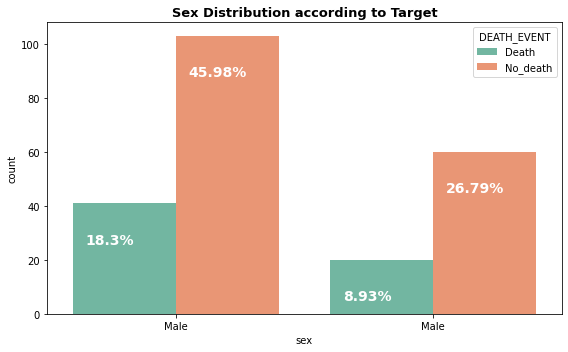

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
name = df['sex']
ax = sns.countplot(x='sex', hue='DEATH_EVENT', data=df, palette='Set2')
ax.set_title("Sex Distribution according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

Men have a greater chance of death by heart failure in comparison to women, this is mainly because women have more oestrogen than men and this is because ...

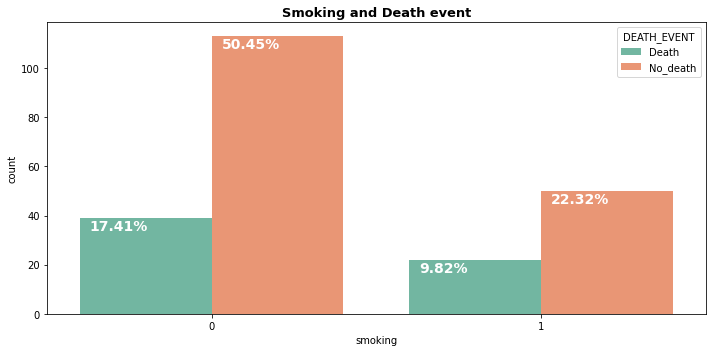

In [ ]:

fig, ax = plt.subplots(figsize=(10,5))
name = df['smoking']
ax = sns.countplot(x='smoking', hue='DEATH_EVENT', data=df, palette='Set2')
ax.set_title("Smoking and Death event", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

Death event more likely in smokers than non-smokers.

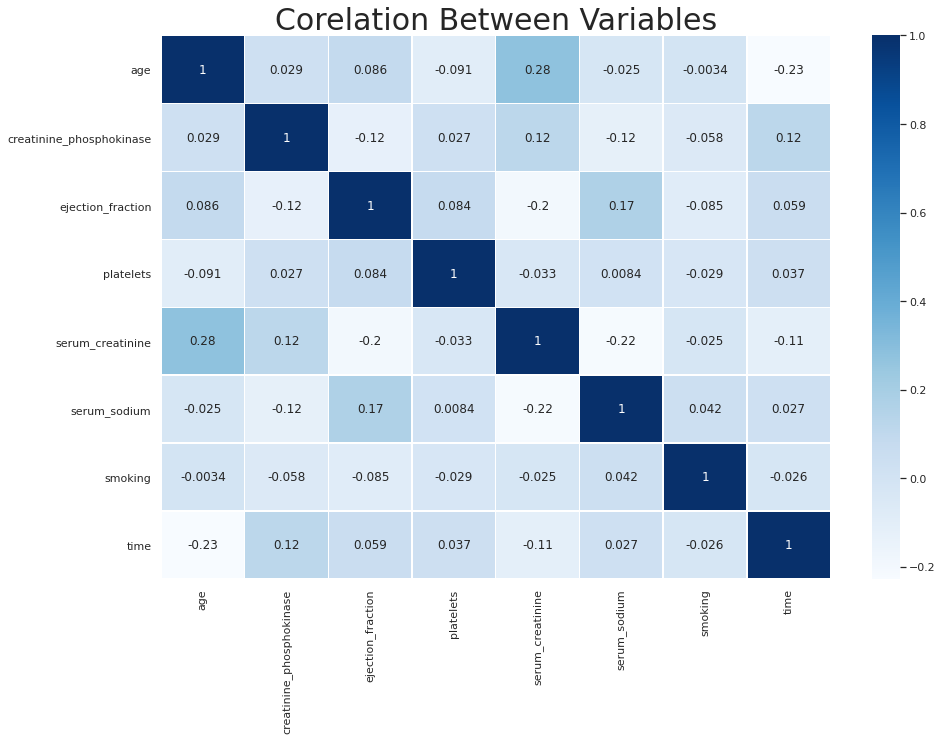

In [ ]:
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

There's a lot of negative correlation present between variables.

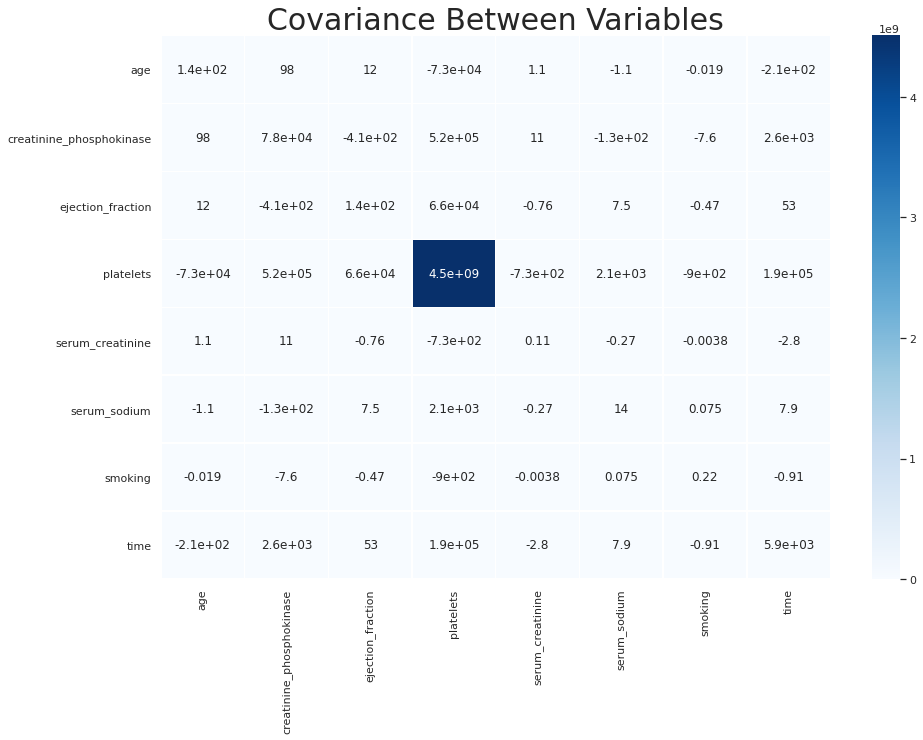

In [ ]:
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(df.cov(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Covariance Between Variables', fontsize = 30)
plt.show()

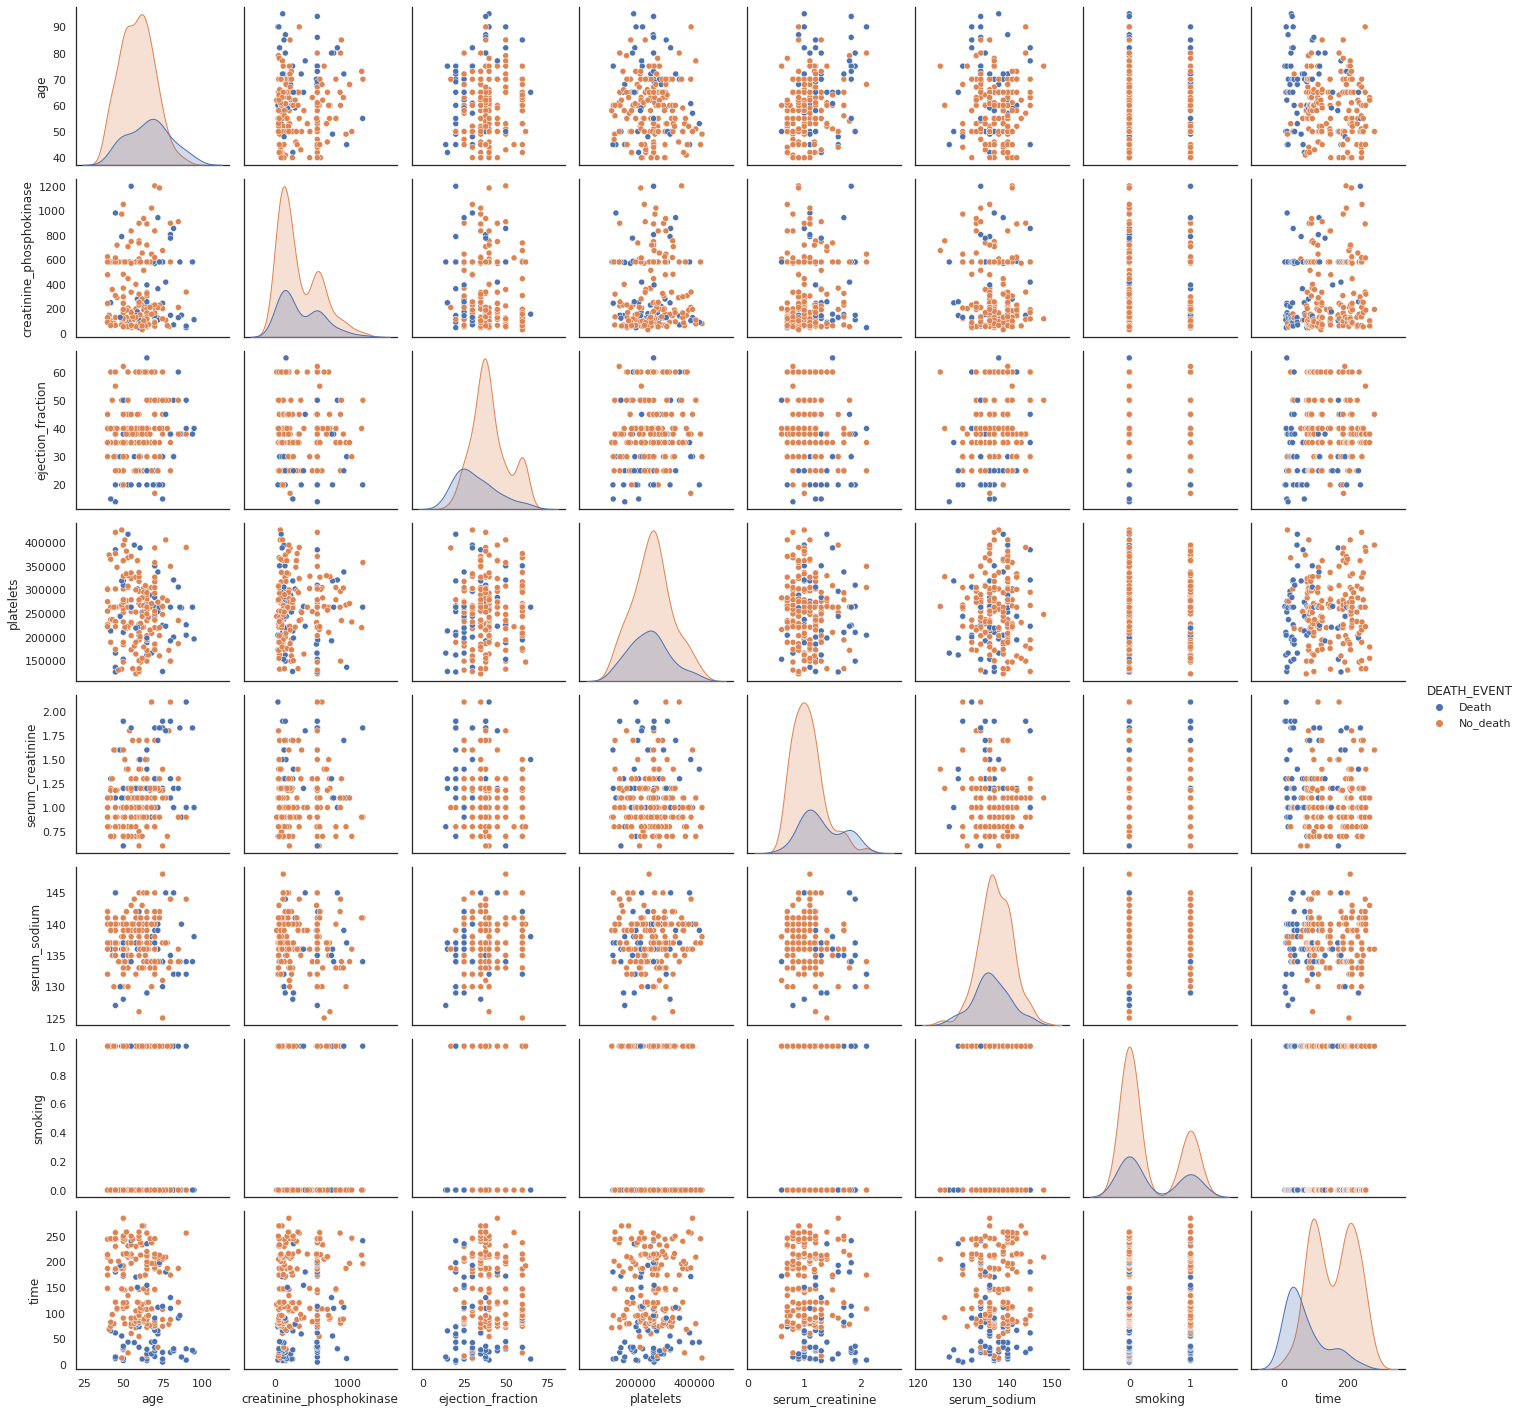

In [ ]:

# pairplot with hue  
sns.pairplot(df, hue ='DEATH_EVENT') 
# to show 
plt.show() 

https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/
https://pub.towardsai.net/building-neural-networks-from-scratch-with-python-code-and-math-in-detail-i-536fae5d7bbf
https://github.com/Prajwal10031999/Titanic-Passenger-Survival-Predictions-using-machine-learning/blob/main/titanic-survival-predictions.ipynb
https://github.com/jakemath/KNN-SKLearn/blob/master/knn.ipynb
